<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/06%20-%20Clustering/Exercises/Solutions/exercise_clustering_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: Clustering

In this exercise we will look at student grades. We will cluster these grades into a number of groups that fits the data.

First let's read in the data into a Pandas data frame:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/grades.csv"

grades = pd.read_csv(url)
grades.head(10)

,Grades
0,73.07
1,76.39
2,1.56
3,18.49
4,60.04
5,40.67
6,44.35
7,33.49
8,35.75
9,38.29


### Question 1. How many observations are in the grades dataframe?

In [3]:
print(f"There are {len(grades)} observations.")

There are 150 observations.


### Question 2. Plot a histogram of the Grades series

[Text(0.5, 1.0, 'Histogram of student grades')]

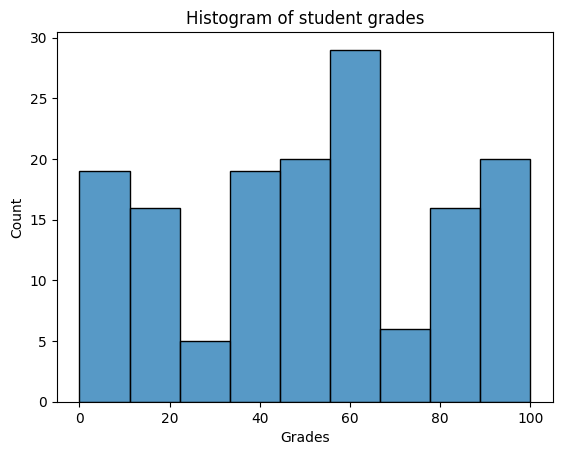

In [4]:
sns.histplot(grades['Grades']).set(title='Histogram of student grades')

### Question 3. Plot the grades as a one-dimension scatterplot:

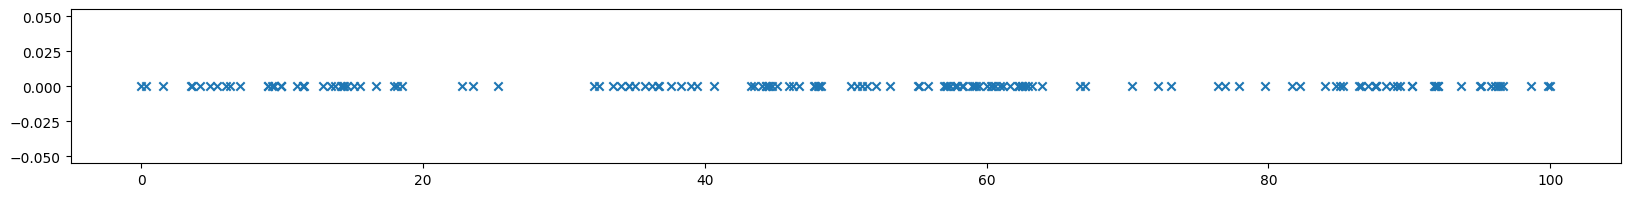

In [5]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')

### Question 4. Fit a KMeans algorithm for k=2, random_state=0, as shown in the walkthrough

In [6]:
# Create KMeans model
model2 = KMeans(n_clusters=2, random_state=0)

# Fit the model on grades
model2.fit(grades)

KMeans(n_clusters=2, random_state=0)

### Question 5. Print the resulting model labels, the cluster centers, and make a one-dimension scatterplot with the grades colored by the cluster they belong to.

In [7]:
# Print the labels
model2.labels_

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
# Print the cluster centers
model2.cluster_centers_

array([[73.99303797],
       [25.07225352]])

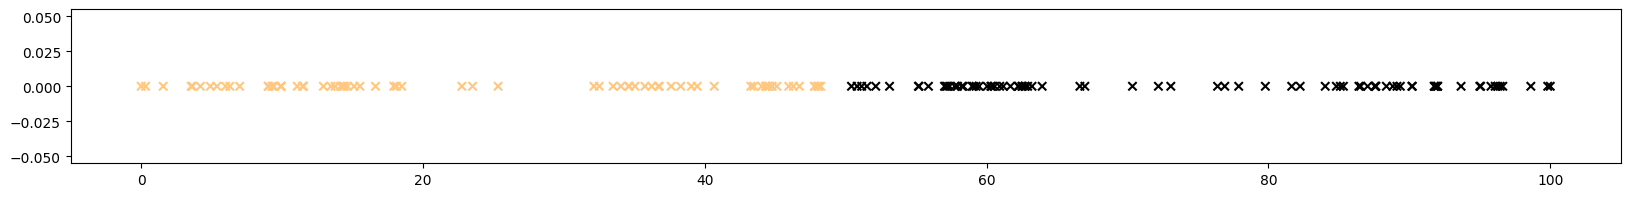

In [9]:
# One dimension scatterplot
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')

##### Add the cluster centers to your scatterplot above in red

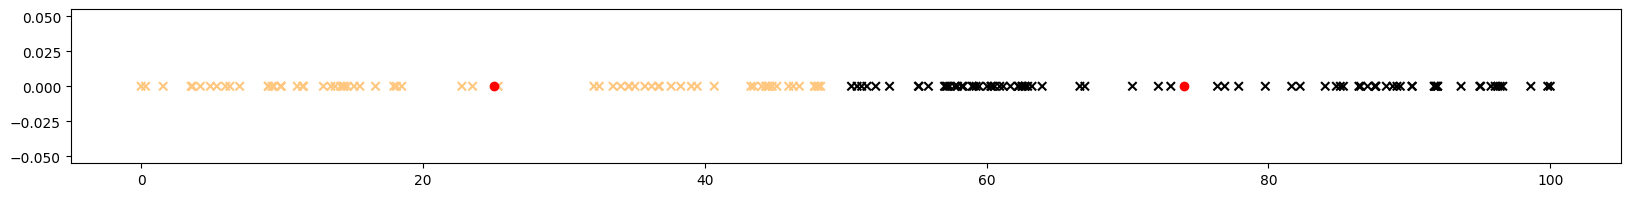

In [10]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')
plt.scatter(model2.cluster_centers_, np.zeros_like(model2.cluster_centers_), color='red')

### Question 6. Use the elbow method to find the optimal value of k.

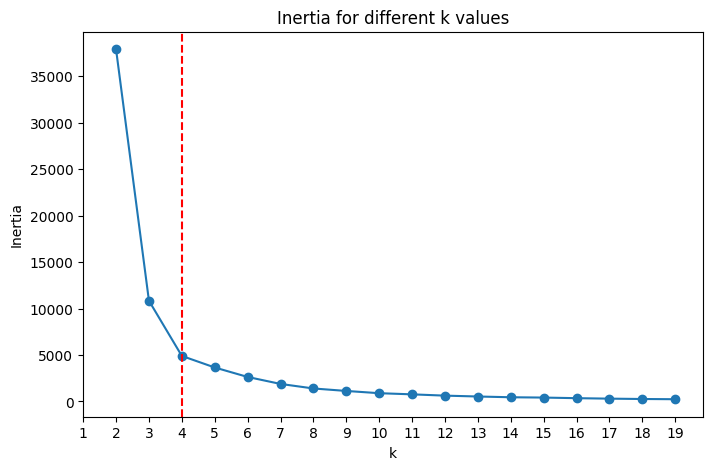

In [11]:
inertia = []
k_values = range(2, 20)
for k in k_values:
  model = KMeans(n_clusters=k, random_state=0, n_init=5)
  model.fit(grades)
  inertia.append(model.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='solid')
plt.title('Inertia for different k values')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
plt.axvline(x=4, color='r', linestyle='--')
plt.show()

### Question 7. Use an AgglomerativeClustering model, with 5 clusters, euclidean distance and average linkage to partition the grades

In [12]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
clustering.fit(grades)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [13]:
clustering.labels_

array([3, 3, 0, 0, 4, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 4, 2, 0, 4, 0, 1,
       2, 2, 1, 0, 1, 2, 2, 1, 1, 3, 0, 4, 2, 4, 1, 1, 3, 1, 1, 4, 3, 2,
       0, 1, 0, 4, 0, 0, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 4, 0, 4, 4, 2, 0,
       2, 2, 1, 2, 0, 3, 4, 0, 4, 2, 0, 2, 4, 1, 4, 4, 2, 1, 0, 0, 2, 1,
       4, 0, 4, 2, 3, 2, 4, 4, 0, 0, 0, 3, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 4, 0, 1, 0, 1, 4, 1, 0, 0, 1, 2, 4, 4, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 4, 3, 1, 4, 4, 4, 4, 4])

### Question 8. Use the one-dimensional scatter plot to show how the clusters were formed with the hierachical clustering model trained above

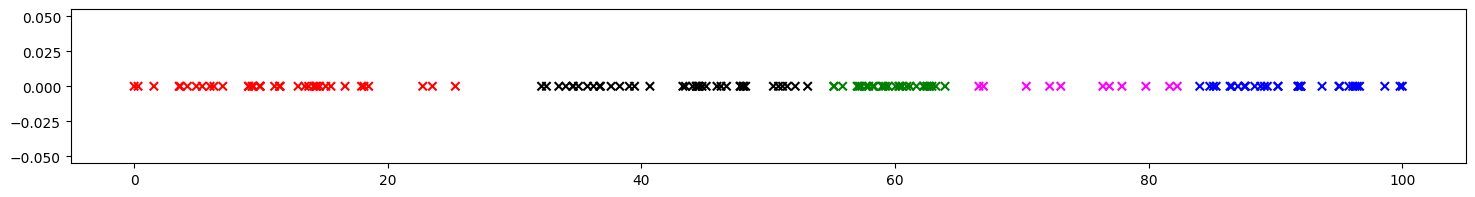

In [14]:
# Plot the grades colored by the labels of the hierarchical model trained above
plt.figure(figsize=(18,2))
colors = ["red", "black", "blue", "magenta", "green"]
plt.scatter(grades, np.zeros_like(grades), marker='x', c=[colors[i] for i in clustering.labels_])

### Question 9. Plot the dendrogram for the hierarchical clustering model trained above

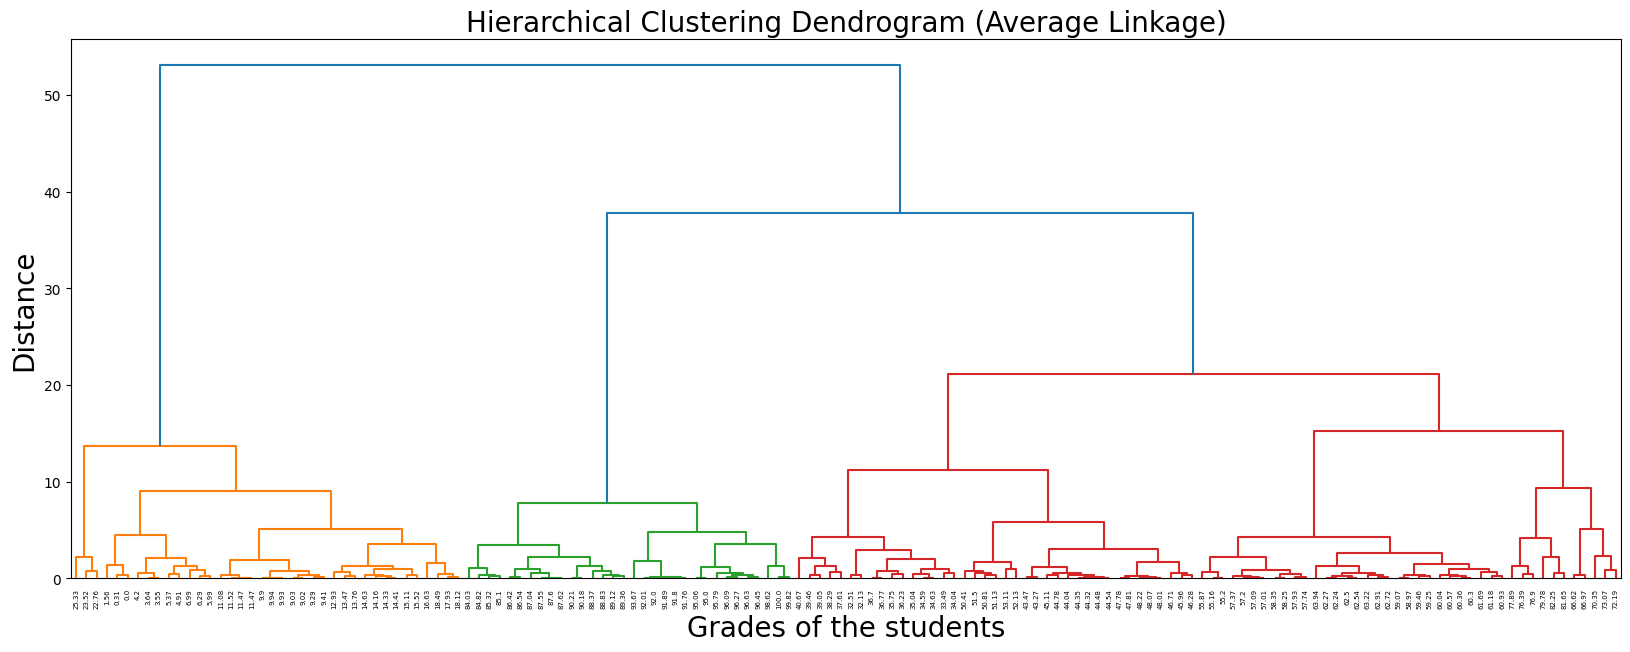

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)', fontsize=20)
plt.xlabel('Grades of the students', fontsize=20)
plt.ylabel('Distance', fontsize=20)

Z = linkage(grades, method='average', metric='euclidean') # Provide the linkage method we want and the chosen distance metric.
dendrogram(Z, labels=np.array(grades).flatten()) # Compute the dendogram according the linkage

plt.show()

From the dendrogram, we can see that at the distance of 30, three clusters are formed.